In [237]:
# from sympy import *
# init_printing(use_unicode=True)
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from pylab import *

# Analytical resuls
# Waverplate + linear polarizer

def lin_hwp_linh(th,rhoh):
    '''
    Input wave: Lineary polarlized light -> HWP -> horizontal linear polarizer
    th: polarization angle of input wave
    rhoh : rotation angle of Half Wave Plate
    '''
    return (np.sin(4*rhoh)*np.sin(2*th))/2+(np.cos(4*rhoh)*np.cos(2*th))/2+1/2.

# Lineary polarlized light -> HWP -> vertical linear polarizer
def lin_hwp_linv(th,rhoh):
    '''
    Input wave: Lineary polarlized light -> HWP -> vertical linear polarizer
    th: polarization angle of input wave
    rhoh : rotation angle of Half Wave Plate
    '''
    return -(np.sin(4*rhoh)*np.sin(2*th))/2-(np.cos(4*rhoh)*np.cos(2*th))/2+1/2.

def circ_hwp_lin0(rhoh):
    '''
    Input wave: Circularly (R/L) polarlized light -> HWP -> vertical linear polarizer
    rhoh : rotation angle of Half Wave Plate
    '''
    return 1/2.

circ_hwp_lin = np.vectorize(circ_hwp_lin0, otypes=[float])

def lin_qwp_linh(th,rhoq):
    '''
    Input wave: Lineary polarlized light -> QWP -> horizontal linear polarizer
    th: polarization angle of input wave
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return (np.sin(4*rhoq)*np.sin(2*th))/4+((np.cos(4*rhoq)+1)*np.cos(2*th))/4+1/2.

def lin_qwp_linv(th,rhoq):
    '''
    Input wave: Lineary polarlized light -> QWP -> vertical linear polarizer
    th: polarization angle of input wave
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return -(np.sin(4*rhoq)*np.sin(2*th))/2-(np.cos(4*rhoq)*np.cos(2*th))/2+1/2.

def rcirc_qwp_linh(rhoq):
    '''
    Input wave: Right circularly polarlized light -> QWP -> horizontal linear polarizer
    th: polarization angle of input wave
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return 1/2.-np.sin(2*rhoq)/2

def rcirc_qwp_linv(rhoq):
    '''
    Input wave: Right circularly polarlized light -> QWP -> vertical linear polarizer
    th: polarization angle of input wave
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return np.sin(2*rhoq)/2+1/2.

def lcirc_qwp_linh(rhoq):
    '''
    Input wave: Left circularly polarlized light -> QWP -> horizontal linear polarizer
    th: polarization angle of input wave
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return np.sin(2*rhoq)/2+1/2.

def lcirc_qwp_linv(rhoq):
    '''
    Input wave: Left circularly polarlized light -> QWP -> vertical linear polarizer
    th: polarization angle of input wave
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return 1/2.-np.sin(2*rhoq)/2

def lin_hwp_qwp_linh(th,rhoh,rhoq):
    '''
    Input wave: Lineary polarlized light -> HWP -> QWP -> horizontal linear polarizer
    th: polarization angle of input wave
    rhoh : rotation angle of Half Wave Plate
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return ((np.sin(4*rhoh)-np.sin(4*rhoq-4*rhoh))*np.sin(2*th))/4+((np.cos(4*rhoq-4*rhoh)+np.cos(4*rhoh))*np.cos(2*th))/4+1/2.

# linearly polarized light -> HWP -> QWP -> vertical linear polarizer
def lin_hwp_qwp_linv(th,rhoh,rhoq):
    '''
    Input wave: Lineary polarlized light -> HWP -> QWP -> vertical linear polarizer
    th: polarization angle of input wave
    rhoh : rotation angle of Half Wave Plate
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return ((np.sin(4*rhoq-4*rhoh)-np.sin(4*rhoh))*np.sin(2*th))/4+((-np.cos(4*rhoq-4*rhoh)-np.cos(4*rhoh))*cos(2*th))/4+1/2.

def rcirc_hwp_qwp_linh(rhoh,rhoq):
    '''
    Input wave: R (L) circularly polarlized light -> HWP -> QWP -> horizontal (vertical) linear polarizer
    rhoh : rotation angle of Half Wave Plate
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return np.sin(2*rhoq)/2+1/2.

def lcirc_hwp_qwp_linh(rhoh,rhoq):
    '''
    Input wave: L (R) circularly polarlized light -> HWP -> QWP -> horizontal (vertical) linear polarizer
    rhoh : rotation angle of Half Wave Plate
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return 1/2.-np.sin(2*rhoq)/2


# linearly polarized light -> HWP -> QWP -> vertical linear polarizer
def lin_qwp_hwp_linh(th,rhoq,rhoh):
    '''
    Input wave: Lineary polarlized light -> QWP -> HWP -> horizontal linear polarizer
    th: polarization angle of input wave
    rhoh : rotation angle of Half Wave Plate
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return ((np.sin(4*rhoq-4*rhoh)+np.sin(4*rhoh))*np.sin(2*th))/4+((np.cos(4*rhoq-4*rhoh)+np.cos(4*rhoh))*np.cos(2*th))/4+1/2.

def rcirc_qwp_hwp_linh(rhoq,rhoh):
    '''
    Input wave: R (L) circularly polarlized light -> QWP -> HWP -> horizontal (vertical) linear polarizer
    rhoh : rotation angle of Half Wave Plate
    rhoq : rotation angle of Quarter Wave Plate
    '''
    return 1/2.-np.sin(2*rhoq-4*rhoh)/2

def rotT(th):
    '''
    Rotation matrix
    th: angle of rotation
    '''
    return np.matrix([[1,0,0,0],[0,np.cos(2*th),np.sin(2*th),0],[0,-np.sin(2*th),np.cos(2*th),0],[0,0,0,1]])

def retarder(gamma):
    '''
    Mueller matrix of retarder with fast axis horizontal
    gamma: retardation parameter, pi/2 for quarter waveplate, pi for half waveplate
    '''
    return np.matrix([[1,0,0,0],[0,1,0,0],[0,0,np.cos(gamma),np.sin(gamma)],[0,0,-np.sin(gamma),np.cos(gamma)]])

def rotation(m,th):
    '''
    Rotation of Mueller matrix
    m: Mueller matrix
    th: rotation angle
    '''
    return np.dot(np.dot(rotT(-th),m),rotT(th))

def linear_polarizer(th):
    '''
    Stokes parameter of the linear polarizer
    th: angle of transmission axis
    '''
    polh0=np.matrix([[1,1,0,0],[1,1,0,0],[0,0,0,0],[0,0,0,0]])/2.  #  Mueller matrix of polarizer with transmission axis horizontal
    return rotation(polh0,th)

def QWP(th):
    '''
    Mueller matrix of quarter wave plate
    th: angle of rotation (0 for fast axis horizontal)
    '''
    qwp0=retarder(math.pi/2)  #  Mueller matrix of quarter wave plate with fast axis horizontal
    return rotation(qwp0,th)

def HWP(th):
    '''
    Mueller matrix of half wave plate
    th: angle of rotation (0 for fast axis horizontal)
    '''
    hwp0=retarder(math.pi)  #  Mueller matrix of half wave plate with fast axis horizontal
    return rotation(hwp0,th)

(0.0, 1.0)

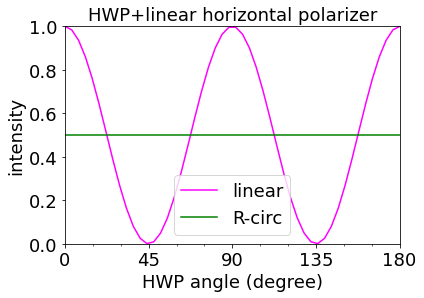

In [232]:
# analytical results

# HWP

th_list=np.linspace(0,math.pi,endpoint=True)
res1_list = lin_hwp_linh(0,th_list)
res2_list = circ_hwp_lin(th_list)

fig,ax=plt.subplots()
ax.plot(th_list*180/math.pi,res1_list,label='linear',color='magenta')
ax.plot(th_list*180/math.pi,res2_list,label='R-circ',color='green')
# plt.hlines([horizontal],left,right,"blue")
ax.legend(loc='best',fontsize=18)
ax.set_title('HWP+linear horizontal polarizer',fontsize=18)
ax.set_xlabel('HWP angle (degree)',fontsize=18)
ax.set_ylabel('intensity',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.set_xlim(0,180)
ax.set_ylim(0,1)

(0.0, 1.0)

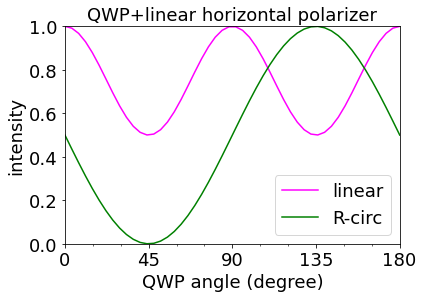

In [243]:
# QWP

res1_list = lin_qwp_linh(0,th_list)
res2_list = rcirc_qwp_linh(th_list)

fig,ax=plt.subplots()
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.plot(th_list*180/math.pi,res1_list,label='linear',color='magenta')
ax.plot(th_list*180/math.pi,res2_list,label='R-circ',color='green')
# plt.hlines([horizontal],left,right,"blue")
ax.legend(loc='best',fontsize=18)
ax.set_title('QWP+linear horizontal polarizer',fontsize=18)
ax.set_xlabel('QWP angle (degree)',fontsize=18)
ax.set_ylabel('intensity',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.set_xlim(0,180)
ax.set_ylim(0,1)

(0.0, 180.0)

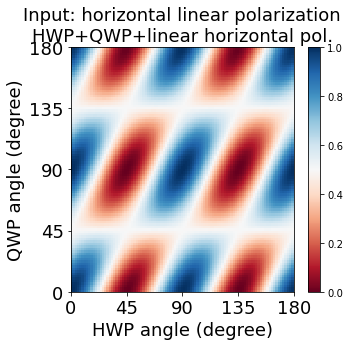

In [170]:
phi_m = np.linspace(0, np.pi, 100)
phi_p = np.linspace(0, np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
# Z=np.empty_like(X)
Z=lin_hwp_qwp_linh(0,X,Y)

fig, ax = plt.subplots(figsize=(5,4.5))

p = ax.pcolor(X/(np.pi)*180, Y/(np.pi)*180, Z, cmap=matplotlib.cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax)
ax.set_title('Input: horizontal linear polarization\nHWP+QWP+linear horizontal pol.',fontsize=18)
ax.set_xlabel('HWP angle (degree)',fontsize=18)
ax.set_ylabel('QWP angle (degree)',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_yticks([0,45,90,135,180])
ax.set_ylim(0,180)


(0.0, 180.0)

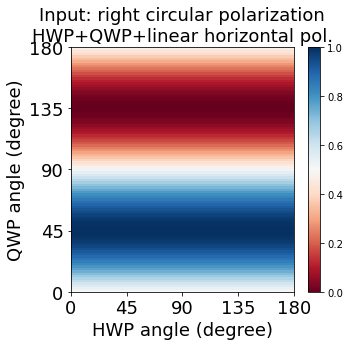

In [171]:
Z=rcirc_hwp_qwp_linh(X,Y)

fig, ax = plt.subplots(figsize=(5,4.5))

p = ax.pcolor(X/(np.pi)*180, Y/(np.pi)*180, Z, cmap=matplotlib.cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax)
ax.set_title('Input: right circular polarization\nHWP+QWP+linear horizontal pol.',fontsize=18)
ax.set_xlabel('HWP angle (degree)',fontsize=18)
ax.set_ylabel('QWP angle (degree)',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_yticks([0,45,90,135,180])
ax.set_ylim(0,180)



(0.0, 180.0)

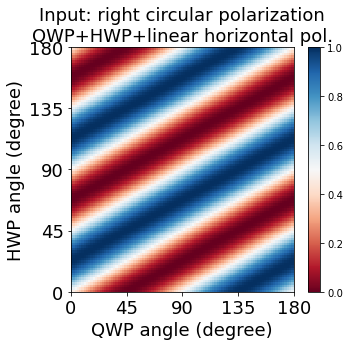

In [238]:
# Z=np.empty_like(X)
Z=rcirc_qwp_hwp_linh(X,Y)

fig, ax = plt.subplots(figsize=(5,4.5))

p = ax.pcolor(X/(np.pi)*180, Y/(np.pi)*180, Z, cmap=matplotlib.cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax)
ax.set_title('Input: right circular polarization\nQWP+HWP+linear horizontal pol.',fontsize=18)
ax.set_xlabel('QWP angle (degree)',fontsize=18)
ax.set_ylabel('HWP angle (degree)',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_yticks([0,45,90,135,180])
ax.set_ylim(0,180)


(0.0, 180.0)

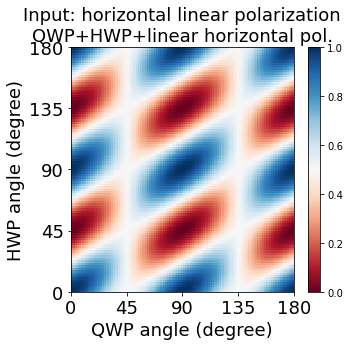

In [239]:
Z=lin_qwp_hwp_linh(0,X,Y)

fig, ax = plt.subplots(figsize=(5,4.5))

p = ax.pcolor(X/(np.pi)*180, Y/(np.pi)*180, Z, cmap=matplotlib.cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax)
ax.set_title('Input: horizontal linear polarization\nQWP+HWP+linear horizontal pol.',fontsize=18)
ax.set_xlabel('QWP angle (degree)',fontsize=18)
ax.set_ylabel('HWP angle (degree)',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_yticks([0,45,90,135,180])
ax.set_ylim(0,180)



(0.0, 1.0)

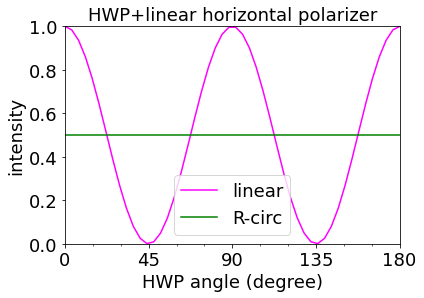

In [235]:
# Mueller calculus

polh0=np.matrix([[1,1,0,0],[1,1,0,0],[0,0,0,0],[0,0,0,0]])/2.  #  Mueller matrix of polarizer with transmission axis horizontal
hwp0=retarder(math.pi)  #  Mueller matrix of half wave plate with fast axis horizontal
qwp0=retarder(math.pi/2)  #  Mueller matrix of quarter wave plate with fast axis horizontal
s_linpol0=[1,1,0,0]  #  Stokes parameter for horizontally linearly polarized light
s_rpol0=[1,0,0,1]   #  Stokes parameter for right ciruclarly polarized light
    
res1_list=np.dot(np.dot(linear_polarizer(0),rotation(hwp0,th_list)),s_linpol0)[0,0]
res2_list=np.dot(np.dot(linear_polarizer(0),rotation(hwp0,th_list)),s_rpol0)[0,0]

fig,ax=plt.subplots()
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.plot(th_list*180/math.pi,res1_list,label='linear',color='magenta')
ax.plot(th_list*180/math.pi,res2_list,label='R-circ',color='green')
ax.legend(loc='best',fontsize=18)
ax.set_title('HWP+linear horizontal polarizer',fontsize=18)
ax.set_xlabel('HWP angle (degree)',fontsize=18)
ax.set_ylabel('intensity',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.set_xlim(0,180)
ax.set_ylim(0,1)

(0.0, 1.0)

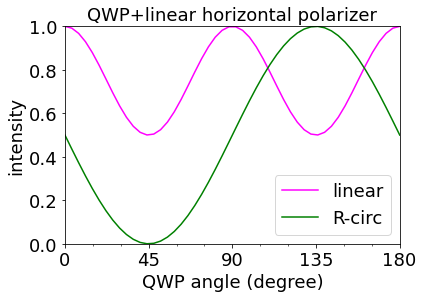

In [236]:
res1_list=np.dot(np.dot(linear_polarizer(0),rotation(qwp0,th_list)),s_linpol0)[0,0]
res2_list=np.dot(np.dot(linear_polarizer(0),rotation(qwp0,th_list)),s_rpol0)[0,0]

fig,ax=plt.subplots()
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.plot(th_list*180/math.pi,res1_list,label='linear',color='magenta')
ax.plot(th_list*180/math.pi,res2_list,label='R-circ',color='green')
ax.legend(loc='best',fontsize=18)
ax.set_title('QWP+linear horizontal polarizer',fontsize=18)
ax.set_xlabel('QWP angle (degree)',fontsize=18)
ax.set_ylabel('intensity',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.set_xlim(0,180)
ax.set_ylim(0,1)

(0.0, 180.0)

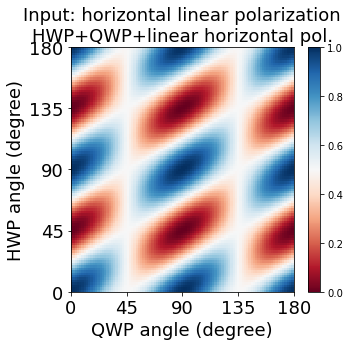

In [240]:
Z=np.dot(np.dot(np.dot(linear_polarizer(0),rotation(qwp0,X)),rotation(hwp0,Y)),s_linpol0)[0,0]

fig, ax = plt.subplots(figsize=(5,4.5))

p = ax.pcolor(X/(np.pi)*180, Y/(np.pi)*180, Z, cmap=matplotlib.cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax)
ax.set_title('Input: horizontal linear polarization\nHWP+QWP+linear horizontal pol.',fontsize=18)
ax.set_xlabel('QWP angle (degree)',fontsize=18)
ax.set_ylabel('HWP angle (degree)',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_yticks([0,45,90,135,180])
ax.set_ylim(0,180)



(0.0, 180.0)

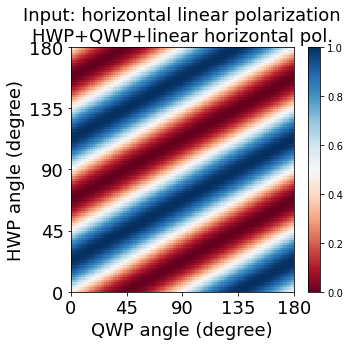

In [244]:
Z=np.dot(np.dot(np.dot(linear_polarizer(0),rotation(hwp0,Y)),rotation(qwp0,X)),s_rpol0)[0,0]

fig, ax = plt.subplots(figsize=(5,4.5))

p = ax.pcolor(X/(np.pi)*180, Y/(np.pi)*180, Z, cmap=matplotlib.cm.RdBu, vmin=0, vmax=1)
cb = fig.colorbar(p, ax=ax)
ax.set_title('Input: horizontal linear polarization\nHWP+QWP+linear horizontal pol.',fontsize=18)
ax.set_xlabel('QWP angle (degree)',fontsize=18)
ax.set_ylabel('HWP angle (degree)',fontsize=18)
ax.tick_params(labelsize=18)
ax.set_xticks([0,45,90,135,180])
ax.set_xlim(0,180)
ax.set_yticks([0,45,90,135,180])
ax.set_ylim(0,180)


